In [407]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [408]:
pd.set_option('max_columns', 120)
pd.set_option('max_colwidth', 5000)

In [409]:
#load the data
raw_df=pd.read_csv('loan.csv',low_memory=False)

### Inspect the data

In [410]:
raw_df.shape

(39717, 111)

In [411]:
raw_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
id                                int64
member_id                         int64
loan_amnt                         int64
funded_amnt                       int64
funded_amnt_inv                   float64
term                              object
int_rate                          object
installment                       float64
grade                             object
sub_grade                         object
emp_title                         object
emp_length                        object
home_ownership                    object
annual_inc                        float64
verification_status               object
issue_d                           object
loan_status                       object
pymnt_plan                        object
url                               object
desc                              object
purpose                           object
title                         

In [412]:
#check the null-count column-wise
raw_df.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [413]:
#null count percentage column-wise
round(100*(raw_df.isnull().sum()/len(raw_df.index)),2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

We see that we have 111 columns out of which multiple columns are having null values. As these columns won't add any value we will discard the columns having more than 50% null values. We create a new dataframe 'df' with the discarded columns.

In [414]:
df=raw_df.loc[:,raw_df.isnull().sum()/len(raw_df.index)<0.5]

In [415]:
df.shape

(39717, 54)

We see that now the number of columns have reduced to 54.

In [416]:
round(100*(df.isnull().sum()/len(df.index)),2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

#### Analyze each column to see what data is needed for our analysis.
#### Our aim is to get rid of columns -
- leaks information from the future (after the loan has already been funded),
- don't affect the borrower's ability to pay back the loan (e.g. a randomly generated ID value by Lending Club), is formatted poorly,
- requires more data or a lot of preprocessing to turn into useful a feature, or
- contains redundant information.

In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

drop the below columns:
- id - its an unique id for loan listing.
- member_id - member unique id.
- emp_title - employer name is not relevant for our analysis.
- issue_d - no significance of date of issue of loan
- url - no significance
- desc - no significance
- paymnt_plan - contains only 'n' as value. irrelevant.
- zip_code - redundant data as only the first 3 digits of the 5 digit zip code are visible.

Below columns are data that are related to loans that have been charged off. These are future data after loan has been defaulted. thus cannot contribute to loan-defaulter analysis.

- out_prncp - this data would be 0 for charged off loans. therefore does not contribute to our analysis.
- out_prncp_inv - this data would be 0 for charged off loans. therefore does not contribute to our analysis. 
- total_pymnt - cannot contribute to analysis
- total_pymnt_inv - cannot contribute to analysis
- total_rec_prncp - cannot contribute to analysis
- total_rec_int - cannot contribute to analysis
- total_rec_late_fee - cannot contribute to analysis
- recoveries - cannot contribute to analysis
- collection_recovery_fee - cannot contribute to analysis
- last_pymnt_d - cannot contribute to analysis
- last_pymnt_amnt - cannot contribute to analysis


In [418]:
df=df.drop(['id','member_id','emp_title','issue_d','url','desc','pymnt_plan','zip_code'],axis=1)

In [419]:
df=df.drop(['out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt'],axis=1)

In [420]:
df.shape

(39717, 35)

we then check for columns that has only one unique value other than null. We can discard those columns as they won't 
add any value to analysis.

In [421]:
df=df.loc[:,df.apply(pd.Series.nunique) != 1]

In [422]:
df.shape

(39717, 27)

In [423]:
round(100*(df.isnull().sum()/len(df.index)),2)

loan_amnt               0.00
funded_amnt             0.00
funded_amnt_inv         0.00
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
sub_grade               0.00
emp_length              2.71
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
loan_status             0.00
purpose                 0.00
title                   0.03
addr_state              0.00
dti                     0.00
delinq_2yrs             0.00
earliest_cr_line        0.00
inq_last_6mths          0.00
open_acc                0.00
pub_rec                 0.00
revol_bal               0.00
revol_util              0.13
total_acc               0.00
last_credit_pull_d      0.01
pub_rec_bankruptcies    1.75
dtype: float64

In [424]:
df.isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
title                     11
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
last_credit_pull_d         2
pub_rec_bankruptcies     697
dtype: int64

### Check the datatypes and format of columns

In [425]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 27 columns):
loan_amnt               39717 non-null int64
funded_amnt             39717 non-null int64
funded_amnt_inv         39717 non-null float64
term                    39717 non-null object
int_rate                39717 non-null object
installment             39717 non-null float64
grade                   39717 non-null object
sub_grade               39717 non-null object
emp_length              38642 non-null object
home_ownership          39717 non-null object
annual_inc              39717 non-null float64
verification_status     39717 non-null object
loan_status             39717 non-null object
purpose                 39717 non-null object
title                   39706 non-null object
addr_state              39717 non-null object
dti                     39717 non-null float64
delinq_2yrs             39717 non-null int64
earliest_cr_line        39717 non-null object
inq_last_6mths  

In [426]:
df.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,Computer,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,May-16,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,Sep-13,0.0


we see that revol_util column is object type. It is basically a percent column. Therefore we remove the trailing '%' sign and convert the data type to float.

In [427]:
df['revol_util']=df['revol_util'].str.rstrip('%').astype('float')

In [428]:
df['int_rate']=df['int_rate'].str.rstrip('%').astype('float')

In [429]:
df.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,Computer,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,May-16,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,Sep-13,0.0


### Analysis

The main goal of the case study is to predict who will pay off a loan and who will default.
We would use a target column on which our analysis will be based. We decide to use "loan_status" column.
In our data loan_status has 3 values- 
- "Fully Paid" 
- "Charged off" 
- "Current"

"current" status cannot give us any information whether the person will be a defaulter or not as its still on-going
and we cannot know the final outcome.
Therefore, we will be working with only the "Fully Paid" and "Charged off" loan_status.


In [430]:
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [431]:
#we drop all rows with loan_status =current
df=df.loc[(df['loan_status']=='Fully Paid') | (df['loan_status']=='Charged Off'),:]

In [432]:
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

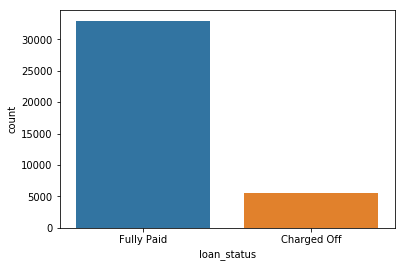

In [433]:
sns.countplot(x='loan_status',data=df)

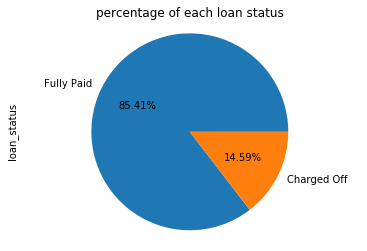

In [434]:
df.loan_status.value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.axis('equal')
plt.title("percentage of each loan status")
plt.show()

we see that about 85.41% of the applicant has paid of the loan but about 14.59% have defaulted.

#### Analysis of loan term factor

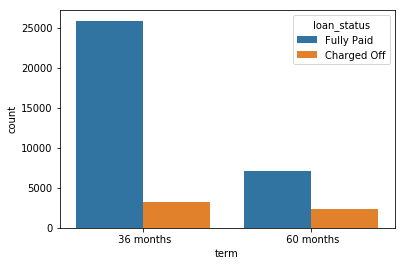

In [436]:
sns.countplot(x = "term", hue = "loan_status", data = df)

In [437]:
len((df_chargedoff.loc[(df_chargedoff['term']==' 36 months'),:]).index)

3227

In [438]:
len((df_chargedoff.loc[(df_chargedoff['term']==' 60 months'),:]).index)

2400

Now we compare the percentage of charged off loans for each "term". We see that When term is 60 months we see a higher percent of loan being charged off and a loss to the lending company.

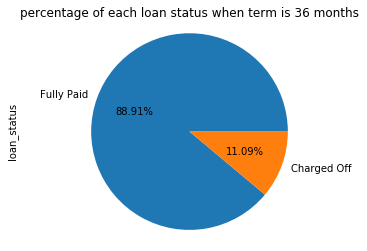

In [439]:
(df.loc[(df['term']==' 36 months'),:]).loan_status.value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.axis('equal')
plt.title("percentage of each loan status when term is 36 months")
plt.show()

In [440]:
round(100*(len((df.loc[(df['term']==' 36 months') & (df['loan_status']=='Charged Off'),:]).index)/len(df.loc[(df['term']==' 36 months'),:])),2)

11.09

In [441]:
round(100*(len((df.loc[(df['term']==' 36 months') & (df['loan_status']=='Fully Paid'),:]).index)/len(df.loc[(df['term']==' 36 months'),:])),2)

88.91

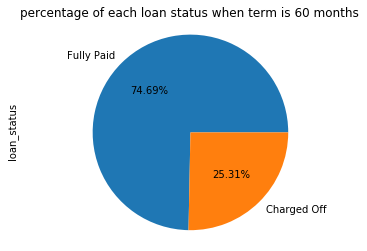

In [442]:
(df.loc[(df['term']==' 60 months'),:]).loan_status.value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.axis('equal')
plt.title("percentage of each loan status when term is 60 months")
plt.show()

In [443]:
round(100*(len((df.loc[(df['term']==' 60 months') & (df['loan_status']=='Charged Off'),:]).index)/len(df.loc[(df['term']==' 60 months'),:])),2)

25.31

In [444]:
round(100*(len((df.loc[(df['term']==' 60 months') & (df['loan_status']=='Fully Paid'),:]).index)/len(df.loc[(df['term']==' 60 months'),:])),2)

74.69

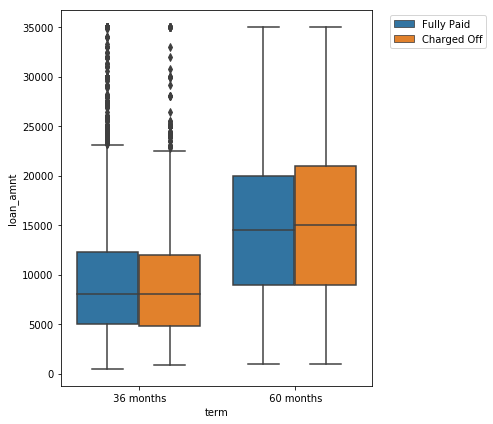

In [445]:
plt.figure(figsize=(7,6))
sns.boxplot(x='term', y='loan_amnt',hue="loan_status",data=df)
plt.legend(bbox_to_anchor=(1.04,1),loc="upper left")
plt.tight_layout()
plt.show()

#### Analysis based on grade

In [446]:
# We make a dataframe to separate the loan_status ="Charged off"
df_chargedoff=df.loc[(df['loan_status']=='Charged Off'),:]

In [447]:
df_grade=df_chargedoff.groupby('grade').count()['loan_status']

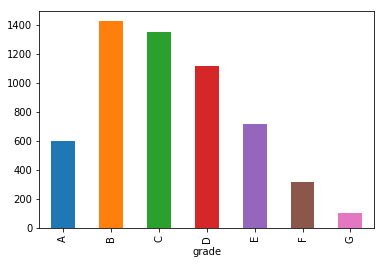

In [448]:
df_grade.plot.bar()

In [449]:
df_chargedoff.grade.value_counts()

B    1425
C    1347
D    1118
E     715
A     602
F     319
G     101
Name: grade, dtype: int64

#### Analysis based on sub-grade

In [450]:
df_subgrade=df_chargedoff.groupby('sub_grade').count()['loan_status']

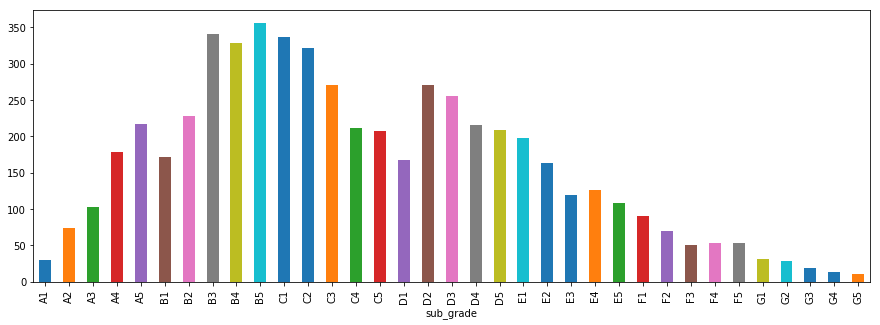

In [451]:
df_subgrade.plot.bar(figsize=(15,5))
plt.show()

In [452]:
df_chargedoff.sub_grade.value_counts()

B5    356
B3    341
C1    336
B4    329
C2    321
D2    271
C3    270
D3    256
B2    228
A5    217
D4    215
C4    212
D5    209
C5    208
E1    198
A4    178
B1    171
D1    167
E2    163
E4    126
E3    119
E5    109
A3    103
F1     91
A2     74
F2     70
F5     54
F4     53
F3     51
G1     31
A1     30
G2     28
G3     19
G4     13
G5     10
Name: sub_grade, dtype: int64

We observe that most of the loans charged off belonged to Grade B and subgrade B5

#### Analysis based on the home ownership

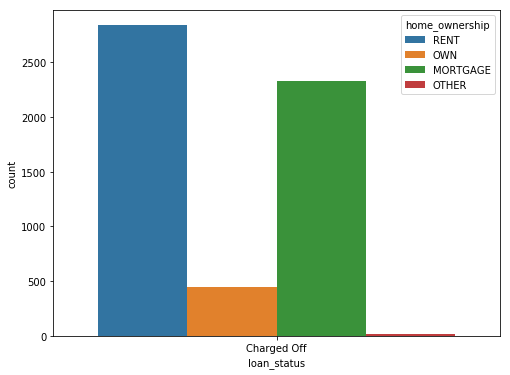

In [453]:
plt.figure(figsize=(8,6))
sns.countplot(x = "loan_status",data = df_chargedoff,hue='home_ownership')
plt.show()

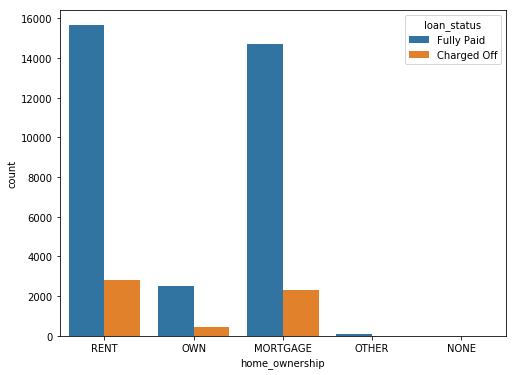

In [454]:
plt.figure(figsize=(8,6))
sns.countplot(x = "home_ownership",data = df,hue='loan_status')
plt.show()

In [455]:
df_chargedoff.home_ownership.value_counts()

RENT        2839
MORTGAGE    2327
OWN          443
OTHER         18
Name: home_ownership, dtype: int64

We observe that charged off loans tend to have home_ownership to be as rent or mortgage

#### Analysis based on verification status

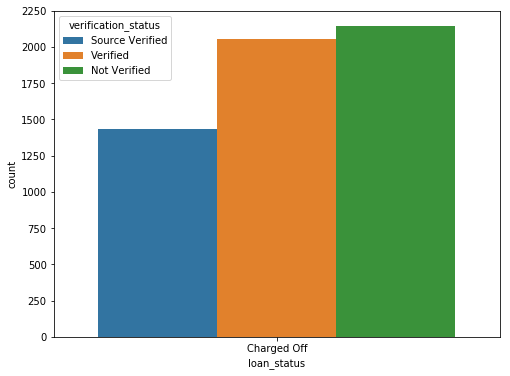

In [456]:
plt.figure(figsize=(8,6))
sns.countplot(x = "loan_status",data = df_chargedoff,hue='verification_status')

In [457]:
df_chargedoff.verification_status.value_counts()

Not Verified       2142
Verified           2051
Source Verified    1434
Name: verification_status, dtype: int64

 We observe that "Not verified" applicants tend to default most.

<function matplotlib.pyplot.show(*args, **kw)>

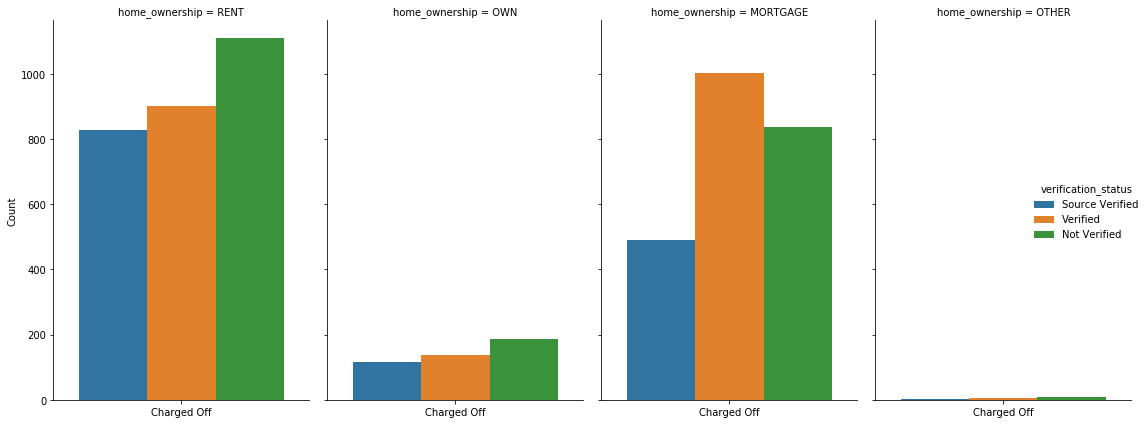

In [458]:
g=sns.catplot(x='loan_status',hue='verification_status',col='home_ownership',kind='count',data=df_chargedoff,height=6, aspect=.6)
(g.set_axis_labels("", "Count"))
plt.tight_layout()
plt.show

We observe that not verified applicants mostly stay in rented accommodation.


#### Analysis based on purpose of loan stated by applicant

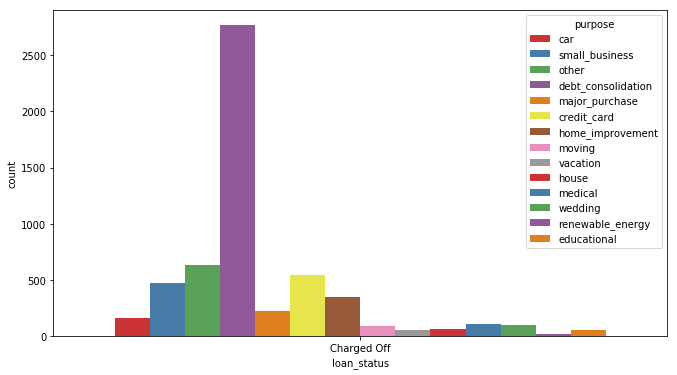

In [459]:
plt.figure(figsize=(11,6), facecolor='w', edgecolor='k')
sns.countplot(x = "loan_status",data = df_chargedoff,hue='purpose',palette="Set1")

In [460]:
df_chargedoff.purpose.value_counts()

debt_consolidation    2767
other                  633
credit_card            542
small_business         475
home_improvement       347
major_purchase         222
car                    160
medical                106
wedding                 96
moving                  92
house                   59
educational             56
vacation                53
renewable_energy        19
Name: purpose, dtype: int64

We observe that purpose stated as "debt_consolidation" tend to default most.

#### Analysis based on annual income of applicant
assuming the income given are in USD, we create the below income brackets:
- Low income category: Applicants that have an annual income lower or equal to 100,000 usd.
- Medium income category: Applicants that have an annual income higher than 100,000 usd but lower or equal to 200,000 usd.
- High income category: Applicants that have an annual income higher tha 200,000 usd.


In [461]:
def incomefunc(x):
    if(x<=100000):
        return('Low')
    elif(x>100000 and x<=200000):
        return("Medium")
    elif(x>200000):
        return("High")

In [462]:
df['income_category']=df.annual_inc.apply(incomefunc)

In [483]:
df_chargedoff['income_category']=df_chargedoff.annual_inc.apply(incomefunc)

In [484]:
df.income_category.value_counts()

Low       32111
Medium     4871
High        562
Name: income_category, dtype: int64

In [485]:
df_chargedoff.income_category.value_counts()

Low       5035
Medium     532
High        60
Name: income_category, dtype: int64

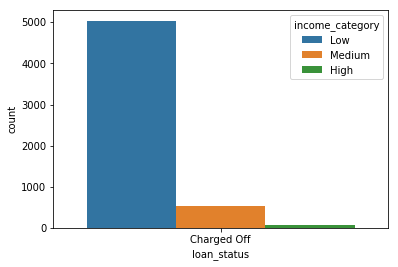

In [486]:
sns.countplot(x = "loan_status",data = df_chargedoff,hue='income_category')

#### Analysis of loan amount and income category

In [467]:
df.loan_amnt.describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [468]:
df_chargedoff.loan_amnt.describe()

count     5627.000000
mean     12104.385108
std       8085.732038
min        900.000000
25%       5600.000000
50%      10000.000000
75%      16500.000000
max      35000.000000
Name: loan_amnt, dtype: float64

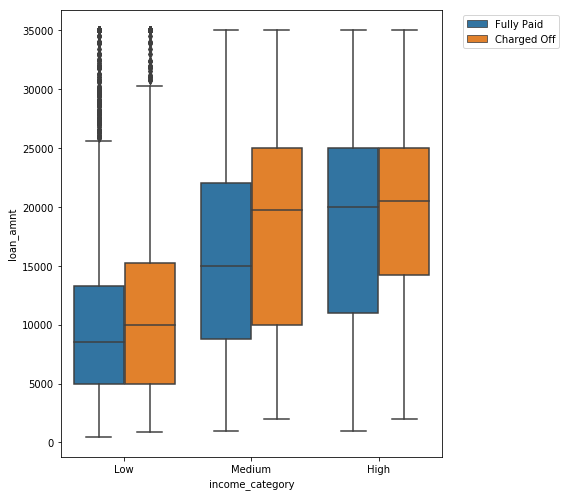

In [469]:
plt.figure(figsize=(8,7))
sns.boxplot(x='income_category', y='loan_amnt', hue="loan_status",data=df)
plt.legend(bbox_to_anchor=(1.04,1),loc="upper left")
plt.tight_layout()
plt.show()

Applicants that belong to the high income category took higher loan amounts than people from low and medium income categories. 
We can observe that applicants who were charged off had taken loans of amount higher than the average amount taken by applicants who fully paid their loan.

#### Analysis based on the employement length

In [470]:
df.emp_length.value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [471]:
#we categorize the employement length (categorical) data by assigniging a numerical value to it.

emp_dict = {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0,
        "n/a": 'NA'
    }
}
    

In [472]:
df=df.replace(emp_dict)

In [473]:
df.emp_length.value_counts()

10.0    8488
0.0     4508
2.0     4291
3.0     4012
4.0     3342
5.0     3194
1.0     3169
6.0     2168
7.0     1711
8.0     1435
9.0     1226
Name: emp_length, dtype: int64

In [474]:
df=df[~ np.isnan(df['emp_length'])]

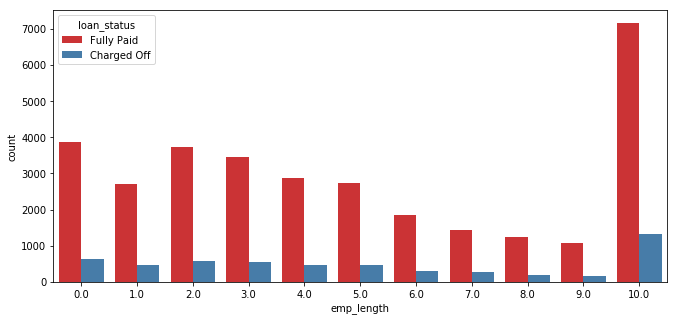

In [475]:
plt.figure(figsize=(11,5), facecolor='w', edgecolor='k')
sns.countplot(x = "emp_length",data = df,hue='loan_status', palette="Set1")
plt.show()

In [476]:
#### Analysis of emp_length and income category

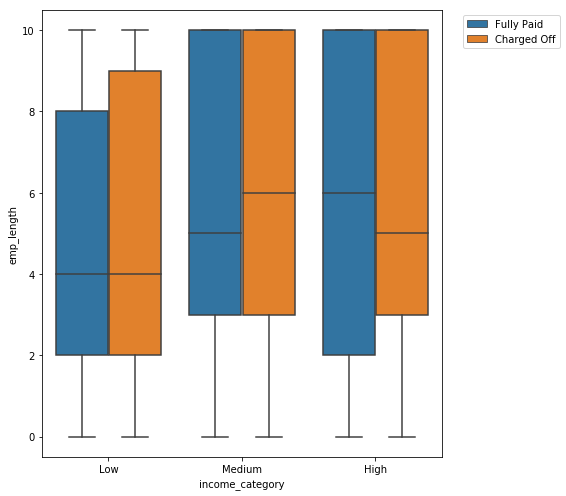

In [477]:
plt.figure(figsize=(8,7))
sns.boxplot(x='income_category', y='emp_length',data=df,hue="loan_status")
plt.legend(bbox_to_anchor=(1.04,1),loc="upper left")
plt.tight_layout()
plt.show()

Applicants with High and Medium annual incomes have a longer employment length than people with lower incomes.

#### Analysis based on dti score

In [478]:
df.dti.describe()

count    37544.000000
mean        13.284186
std          6.660551
min          0.000000
25%          8.160000
50%         13.380000
75%         18.550000
max         29.990000
Name: dti, dtype: float64

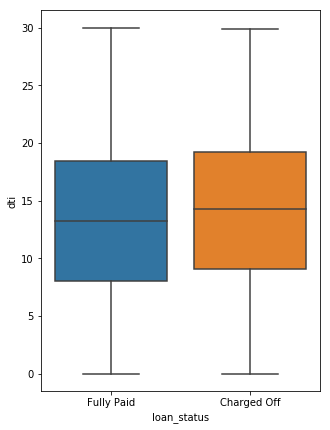

In [479]:
plt.figure(figsize=(5,7))
sns.boxplot(x='loan_status', y='dti',data=df)
plt.show()

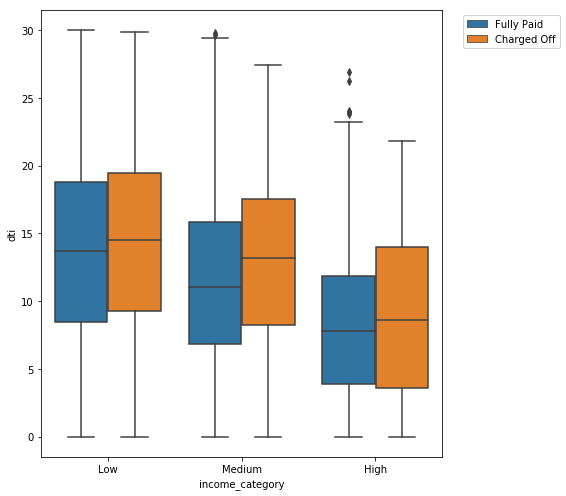

In [480]:
plt.figure(figsize=(8,7))
sns.boxplot(x='income_category', y='dti',hue="loan_status",data=df)
plt.legend(bbox_to_anchor=(1.04,1),loc="upper left")
plt.tight_layout()
plt.show()

We observe that applicants with higher dti tend to default more

#### Analysis based on Revolving utilization

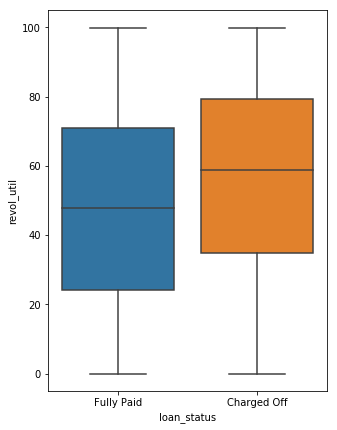

In [481]:
plt.figure(figsize=(5,7))
sns.boxplot(x='loan_status', y='revol_util',data=df)
plt.show()

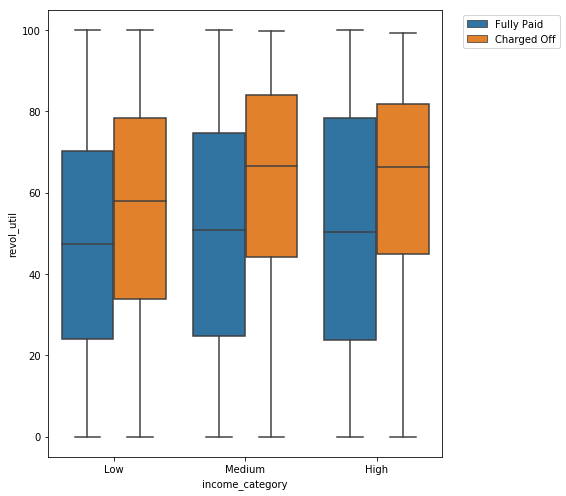

In [482]:
plt.figure(figsize=(8,7))
sns.boxplot(x='income_category', y='revol_util',hue="loan_status",data=df)
plt.legend(bbox_to_anchor=(1.04,1),loc="upper left")
plt.tight_layout()
plt.show()

revolving utilization - its a percentage value which tells you how much percent of your balance revolving credit forms to the total credit limit/total credit taken.
Therefore we see that that applicants that have defaulted all had a higher revolving utilization